In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pylab

import seaborn as sns

import csv

import scipy
from scipy import stats
import statistics

In [2]:
%matplotlib inline
import deepdish as dd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import numpy as np
import brainiak.eventseg.event
from scipy import stats
from scipy.stats import norm, zscore, pearsonr
from scipy.signal import gaussian, convolve
from sklearn import decomposition
import seaborn as sns 
import numpy as np

In [3]:
vectorDim = 100

numNode = 1000

reps = 40
kvalues = 20

# the data structures to save the means for the coherent and incoherent
coherent_means = np.empty(reps)
incoherent_means = np.empty(reps)

coherent_vars_1 = np.empty(reps)
coherent_vars_2 = np.empty(reps) 

incoherent_vars_1 = np.empty(reps)
incoherent_vars_2 = np.empty(reps) 

likelihood = np.zeros([kvalues,reps,2])



In [4]:
# now the radical loop: 1. run 2 reservoirs; 2. calculate time contst; 
# 3.sort;  4. segment (ubuntu)
# here we will just segment the sorted reservoir states

kvalues = 20
reps = 40
for res_seed in range(reps):
 
    ###################################################################
    #
    #               4. Segment
    
    string1 = '/home/peter/Downloads/data-sorted-states/data/sherlock-Sorted_states_seed%s.npy' % res_seed

    Sherlock_SortedStates = np.load(string1) 

    # get the pieces
    #Sherlock_time1=Sherlock_SortedStates[:,0:99]
    #Sherlock_time2=Sherlock_SortedStates[:,900:999]
    
    Sherlock_time1=Sherlock_SortedStates[:,200:299]
    Sherlock_time2=Sherlock_SortedStates[:,500:599]

    Sherlock_time1test=Sherlock_SortedStates[:,200:299]
    Sherlock_time2test=Sherlock_SortedStates[:,500:599]
    
 
    if res_seed == 0:
        Sherlock_time1_cumul = Sherlock_time1
        Sherlock_time2_cumul = Sherlock_time2
    else:
        Sherlock_time1_cumul = Sherlock_time1 + Sherlock_time1_cumul
        Sherlock_time2_cumul = Sherlock_time2 + Sherlock_time2_cumul
    
    # now test the different k values
    
    for iteration in range(kvalues):

        ###################################################################
        #
        #               4. Segment

        #simple data structure for testing

        step = 2
        # Train the two HMS with the predicted segments
        ev_time1 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time1.fit(Sherlock_time1[1000:1650,:])

        ev_time2 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time2.fit(Sherlock_time2[1000:1650,:])
        print((iteration+1)*step)

        # save the variablility scores

        coherent_ev1_var = ev_time1.event_var_
        coherent_ev2_var = ev_time2.event_var_

        # save likelihood scores
        #likelihood[iteration, res_seed,0] = ev_time1.ll_[len(ev_time1.ll_)-1]
        #likelihood[iteration, res_seed,1] = ev_time2.ll_[len(ev_time2.ll_)-1]
        a,likelihood[iteration, res_seed,0] = ev_time1.find_events(Sherlock_time1test[1000:1650,:])
        a,likelihood[iteration, res_seed,1] = ev_time2.find_events(Sherlock_time2test[1000:1650,:])


        print("res_seed = ", res_seed)
        print("Likelihood")
        print(*likelihood[iteration, res_seed,:], sep='\n')


2
res_seed =  0
Likelihood
-1101.504769863805
-1146.355562700379
4
res_seed =  0
Likelihood
-1193.106612265128
-1129.0551443660993
6
res_seed =  0
Likelihood
-1279.1557083942105
-1176.2247180711236
8
res_seed =  0
Likelihood
-1353.0936798101325
-1227.6103541257362
10
res_seed =  0
Likelihood
-1475.6555695979857
-1316.9318722768687
12
res_seed =  0
Likelihood
-1473.2210097345915
-1419.5287064330876
14
res_seed =  0
Likelihood
-1602.356592068247
-1566.8457744512848
16
res_seed =  0
Likelihood
-1713.0575903666384
-1667.3368307001324
18
res_seed =  0
Likelihood
-1812.353121176117
-1765.9642328790753
20
res_seed =  0
Likelihood
-1895.4736272180369
-1846.8824781582705
22
res_seed =  0
Likelihood
-1987.664566434685
-1880.0206851815176
24
res_seed =  0
Likelihood
-2113.5350049429103
-2001.003137614843
26
res_seed =  0
Likelihood
-2217.1629804442764
-2089.2967768830486
28
res_seed =  0
Likelihood
-2328.814746922342
-2230.3676110290453
30
res_seed =  0
Likelihood
-2448.4245965629493
-2348.129871

8
res_seed =  6
Likelihood
-1334.7915639614675
-1342.2771424313098
10
res_seed =  6
Likelihood
-1375.4341390910988
-1422.0011200323472
12
res_seed =  6
Likelihood
-1450.7236398250222
-1525.4124574702728
14
res_seed =  6
Likelihood
-1510.4896789794548
-1666.3601329182725
16
res_seed =  6
Likelihood
-1629.2068457364614
-1793.5114761303334
18
res_seed =  6
Likelihood
-1697.8752215271506
-1879.1593442128633
20
res_seed =  6
Likelihood
-1791.1243710397214
-1941.414917887525
22
res_seed =  6
Likelihood
-1900.9731105655628
-2058.463462683657
24
res_seed =  6
Likelihood
-1985.5921386701677
-2157.1900244895187
26
res_seed =  6
Likelihood
-2102.238683644469
-2298.7770335224104
28
res_seed =  6
Likelihood
-2209.863008227265
-2411.2349328580644
30
res_seed =  6
Likelihood
-2322.5771961600035
-2534.819492775587
32
res_seed =  6
Likelihood
-2364.2635225716544
-2664.262160879068
34
res_seed =  6
Likelihood
-2488.0453148334204
-2766.1738093992435
36
res_seed =  6
Likelihood
-2531.5653249845213
-2858.5

12
res_seed =  12
Likelihood
-1428.059965368635
-1482.2386850167018
14
res_seed =  12
Likelihood
-1548.3082338793536
-1580.0774173513078
16
res_seed =  12
Likelihood
-1670.9278687607111
-1674.7589214133795
18
res_seed =  12
Likelihood
-1721.5588811188497
-1766.1791206394985
20
res_seed =  12
Likelihood
-1823.480190535065
-1795.2992814957452
22
res_seed =  12
Likelihood
-1934.3540021853626
-1856.8073081505522
24
res_seed =  12
Likelihood
-2057.26974033839
-1971.8612565740916
26
res_seed =  12
Likelihood
-2158.020899194185
-2059.0191771847058
28
res_seed =  12
Likelihood
-2265.7040425511
-2147.9472504540618
30
res_seed =  12
Likelihood
-2366.6075183553353
-2259.890913957456
32
res_seed =  12
Likelihood
-2569.5652766928238
-2379.959729995823
34
res_seed =  12
Likelihood
-2566.123187291741
-2465.557399153521
36
res_seed =  12
Likelihood
-2733.8098691988585
-2539.5018815632516
38
res_seed =  12
Likelihood
-2759.232114680154
-2677.521369912138
40
res_seed =  12
Likelihood
-2814.513794791839


14
res_seed =  18
Likelihood
-1528.3960685168704
-1607.3507120181837
16
res_seed =  18
Likelihood
-1630.972144670723
-1720.8421982309876
18
res_seed =  18
Likelihood
-1718.6607293682143
-1796.891708863342
20
res_seed =  18
Likelihood
-1759.9232476525517
-1903.269508616106
22
res_seed =  18
Likelihood
-1868.239120171321
-2019.5052643688732
24
res_seed =  18
Likelihood
-1947.993602191528
-2150.707831003457
26
res_seed =  18
Likelihood
-2026.3080893542424
-2250.996013911949
28
res_seed =  18
Likelihood
-2120.898354043942
-2364.159488374939
30
res_seed =  18
Likelihood
-2221.9282819570712
-2488.747499787575
32
res_seed =  18
Likelihood
-2305.6659472804963
-2610.067142283735
34
res_seed =  18
Likelihood
-2413.9918330216224
-2751.9430456672553
36
res_seed =  18
Likelihood
-2451.28341039848
-2796.8472195097406
38
res_seed =  18
Likelihood
-2488.179606263575
-2896.313829618062
40
res_seed =  18
Likelihood
-2676.110620187975
-3062.326107970971
2
res_seed =  19
Likelihood
-1144.5124152990052
-10

16
res_seed =  24
Likelihood
-1716.0583338867534
-1581.121669324124
18
res_seed =  24
Likelihood
-1809.3965559602382
-1669.863370210513
20
res_seed =  24
Likelihood
-1886.8707798846929
-1745.668767540073
22
res_seed =  24
Likelihood
-1993.5530936836228
-1826.1291751464005
24
res_seed =  24
Likelihood
-2117.8760303345025
-1966.9114770477347
26
res_seed =  24
Likelihood
-2212.138294080243
-2022.8862167349002
28
res_seed =  24
Likelihood
-2284.518107121182
-2156.2770943195105
30
res_seed =  24
Likelihood
-2433.1282018940888
-2274.423977381745
32
res_seed =  24
Likelihood
-2522.53630176535
-2384.8691796154794
34
res_seed =  24
Likelihood
-2617.301501206492
-2472.8910778234695
36
res_seed =  24
Likelihood
-2691.646693051032
-2605.4786441754877
38
res_seed =  24
Likelihood
-2828.2874479044285
-2746.9614942334174
40
res_seed =  24
Likelihood
-2914.9335634095605
-2801.4211483067493
2
res_seed =  25
Likelihood
-1056.558804115177
-1150.8281502562454
4
res_seed =  25
Likelihood
-1141.822260369703

18
res_seed =  30
Likelihood
-1741.32167701058
-1601.7229305320802
20
res_seed =  30
Likelihood
-1841.8592012661757
-1657.8952827899416
22
res_seed =  30
Likelihood
-1923.9918414305844
-1753.4231685067011
24
res_seed =  30
Likelihood
-2054.4246666932163
-1862.2115989252793
26
res_seed =  30
Likelihood
-2120.875386982543
-1950.0942666007
28
res_seed =  30
Likelihood
-2256.624551591624
-2047.242816311967
30
res_seed =  30
Likelihood
-2368.222978490097
-2148.1102100794596
32
res_seed =  30
Likelihood
-2407.3611668828626
-2275.7736859766
34
res_seed =  30
Likelihood
-2491.6950506081166
-2358.5203885463393
36
res_seed =  30
Likelihood
-2609.7476453130657
-2359.1289694696134
38
res_seed =  30
Likelihood
-2671.510308973505
-2486.338244034324
40
res_seed =  30
Likelihood
-2774.6362869273344
-2651.7507853704324
2
res_seed =  31
Likelihood
-1158.5292691653842
-1106.1159482882783
4
res_seed =  31
Likelihood
-1208.131067199195
-1153.984931518487
6
res_seed =  31
Likelihood
-1246.6672099580169
-116

20
res_seed =  36
Likelihood
-1693.696029119935
-1675.857358580162
22
res_seed =  36
Likelihood
-1793.477749241372
-1783.9489621887976
24
res_seed =  36
Likelihood
-1902.9173587291655
-1891.9992309185106
26
res_seed =  36
Likelihood
-1994.0094627986557
-1983.465850403106
28
res_seed =  36
Likelihood
-2091.168698654494
-2073.8005887182453
30
res_seed =  36
Likelihood
-2196.287822573071
-2171.8274090621176
32
res_seed =  36
Likelihood
-2300.624315530566
-2272.504041690038
34
res_seed =  36
Likelihood
-2383.9592401749132
-2391.220189019137
36
res_seed =  36
Likelihood
-2505.845582966373
-2470.988821063039
38
res_seed =  36
Likelihood
-2555.8336131750134
-2562.198561339023
40
res_seed =  36
Likelihood
-2649.63465321827
-2649.4281983248634
2
res_seed =  37
Likelihood
-1107.6660768719676
-1112.1342273898704
4
res_seed =  37
Likelihood
-1127.4737666246695
-1064.7706956186987
6
res_seed =  37
Likelihood
-1187.9046312880607
-1122.891381586517
8
res_seed =  37
Likelihood
-1278.9208463949633
-119

In [5]:
#for the figure get the mean reservoir states
Sherlock_time1_last = Sherlock_time1
Sherlock_time2_last = Sherlock_time2

np.save('Sherlock-time1-last-june10.npy', Sherlock_time1) 
np.save('Sherlock-time2-last-june10.npy', Sherlock_time2) 



In [6]:
Sherlock_time1 = np.load('Sherlock-time1-last-june10.npy') 
Sherlock_time2 = np.load('Sherlock-time2-last-june10.npy') 


In [7]:
Sherlock_time1 = Sherlock_time1_cumul/reps
Sherlock_time2 = Sherlock_time2_cumul/reps

In [8]:
#save the data likelihood
np.save('Sherlock-time1-june10.npy', Sherlock_time1) 
np.save('Sherlock-time2-june10.npy', Sherlock_time2) 

np.save('likelihood-SORTED-find-events-same.npY', likelihood) 

In [9]:
Sherlock_time1 = Sherlock_time1_last
Sherlock_time2 = Sherlock_time2_last

In [10]:
# sement and make figure

ev_time1 = brainiak.eventseg.event.EventSegment(22)
ev_time1.fit(Sherlock_time1[1000:1650,:])

ev_time2 = brainiak.eventseg.event.EventSegment(8)
ev_time2.fit(Sherlock_time2[1000:1650,:])


for j in range(99):
    mean = Sherlock_time1[:,j].mean()
    if abs(mean) > 0.01: #WAS .01
        Sherlock_time1[:,j] = Sherlock_time1[:,j]/mean

for j in range(99):
    mean = Sherlock_time2[:,j].mean()
    if abs(mean) > 0.01:
        Sherlock_time2[:,j] = Sherlock_time2[:,j]/mean

#save the data likelihood
#np.save('Sherlock-time1-june6.npy', Sherlock_time1) 
#np.save('Sherlock-time2-june6.npy', Sherlock_time2) 

#np.save('likelihood-june6.npy', likelihood) 

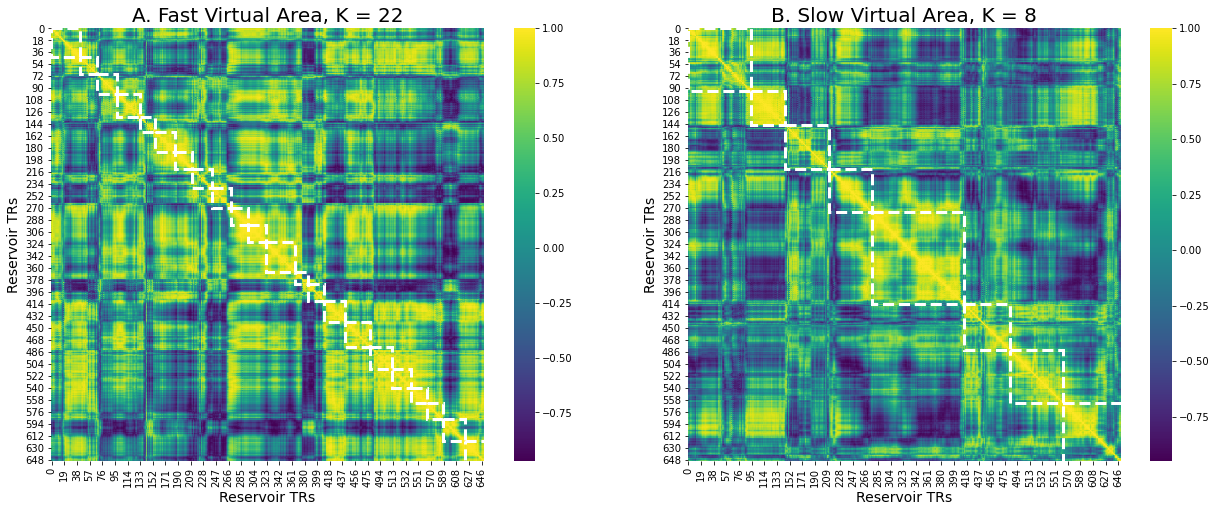

In [11]:
# 3 display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(18, 7))

fig.add_subplot(121)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(122)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)


fig.tight_layout()
plt.savefig('Exp4-june10.png')

In [12]:
tmatrix=np.zeros([kvalues,kvalues])
pmatrix=np.zeros([kvalues,kvalues])
dmatrix=np.zeros([kvalues,kvalues])
                  

In [13]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

for j in range(kvalues):
    for i in range(j):
        # when i < j
        anti = (likelihood[i,:,0]+ likelihood[j,:,1])/2 # small k with fast area + large k with slow area 
        pro = (likelihood[j,:,0]+ likelihood[i,:,1])/2  # large k with fast area + small k with slow area
        dmatrix[i,j]=np.mean(pro-anti)
        t,p = stats.ttest_rel(pro,anti)
        tmatrix[i,j]=t
        pmatrix[i,j]=p
        #if t > 0 and p< 0.01:
        if p<0.05:
            print(i,j,t,p)


1 4 2.347390510547762 0.02407492304075024
2 4 2.499200899190913 0.01676622333726448
3 4 2.1678724918093977 0.03633320283426908
0 5 2.0656294329506055 0.045553472549348904
1 5 2.891033513680329 0.006245866014083107
2 5 3.034687118144839 0.004272517381748119
3 5 2.847417741248672 0.006996565033570084
0 6 3.052480253167221 0.004073735862332396
1 6 3.8768808685964253 0.0003949848346466344
2 6 4.2721768428936056 0.00012034836926456163
3 6 3.914778713772306 0.00035301936672752003
4 6 3.6049426139863976 0.0008741050827158993
5 6 2.635796084553496 0.0119843030803752
0 7 2.810522916959046 0.007696435829028495
1 7 3.5978277337941793 0.0008922006689624758
2 7 3.801210990839179 0.0004937282767436687
3 7 3.7132807208533225 0.0006386065104500569
4 7 3.298953439011717 0.0020784187534599046
5 7 2.534013408972524 0.015405000643922006
0 8 2.8194544296139536 0.007521269464821831
1 8 3.5008911598710317 0.0011776347477011266
2 8 3.6543451912108167 0.0007578563474733152
3 8 3.6396607436433035 0.000790756397

(20, 20)
31
0.00018967726328148631
0.00018644913630493548


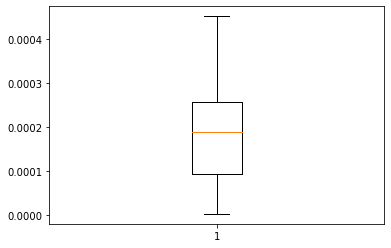

In [33]:
print(pmatrix.shape)
imin=1
imax=6#5
jmin=11#10
jmax=15#19

imin=1
imax=5#5
jmin=12#10
jmax=20#19
pmeans=np.zeros([(imax-imin)*(jmax-jmin)])
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

count=0
for i in range(imin,imax):
    for j in range(jmin,jmax):
        #print(i,j,pmatrix[i,j],count)
        pmeans[count]=pmatrix[i,j]
        count=count+1
print(count-1)
print(statistics.median(pmeans))
print(statistics.mean(pmeans))
plt.boxplot(pmeans)
plt.show()



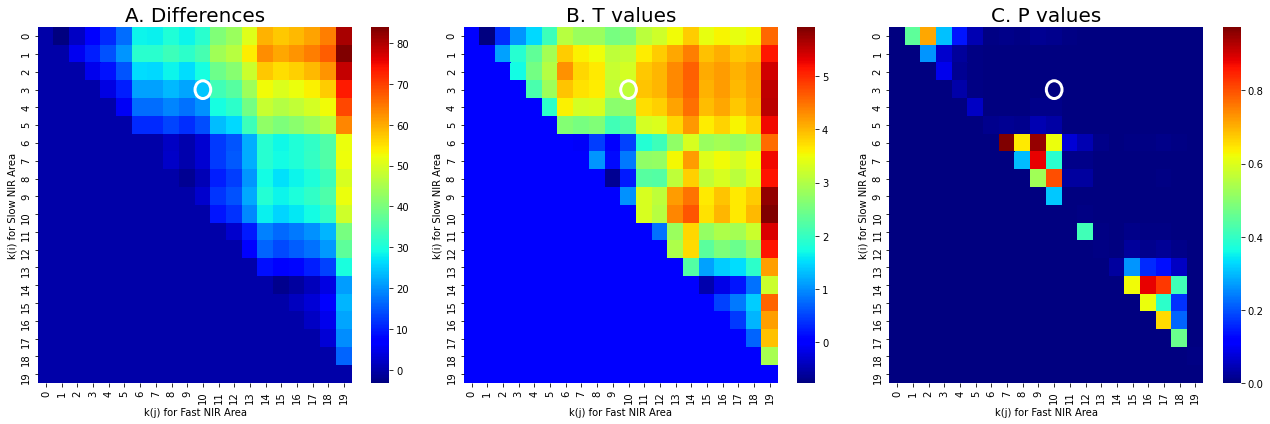

In [15]:
# 3 display the segmentation
color='jet'
ec='black'
scale=0.9
lw=2

fs1 = 14
fs2 = 20



fig=plt.figure(figsize=(18, 6))

fig.add_subplot(131)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('A. Differences', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(132)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(tmatrix, cmap=color)
plt.title('B. T values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(133)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color)
plt.title('C. P values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.tight_layout()
plt.savefig('likelihoodk-areas-no-norm.png')

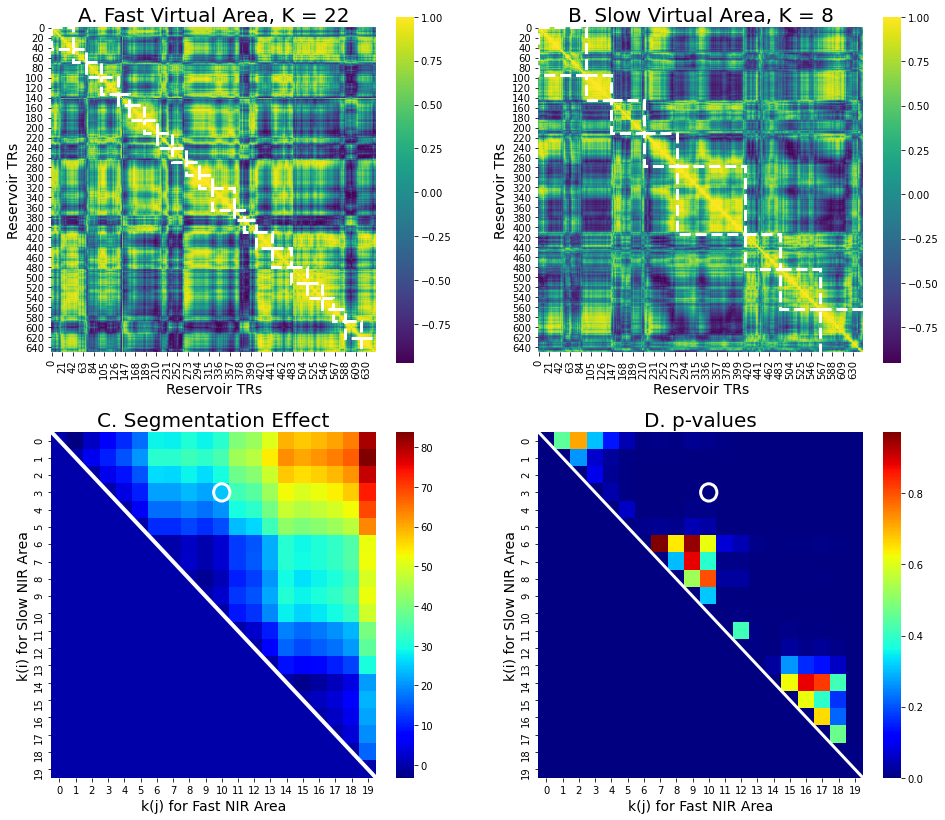

In [16]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################
color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('F10-Exp4-sherlock.png', dpi=600)


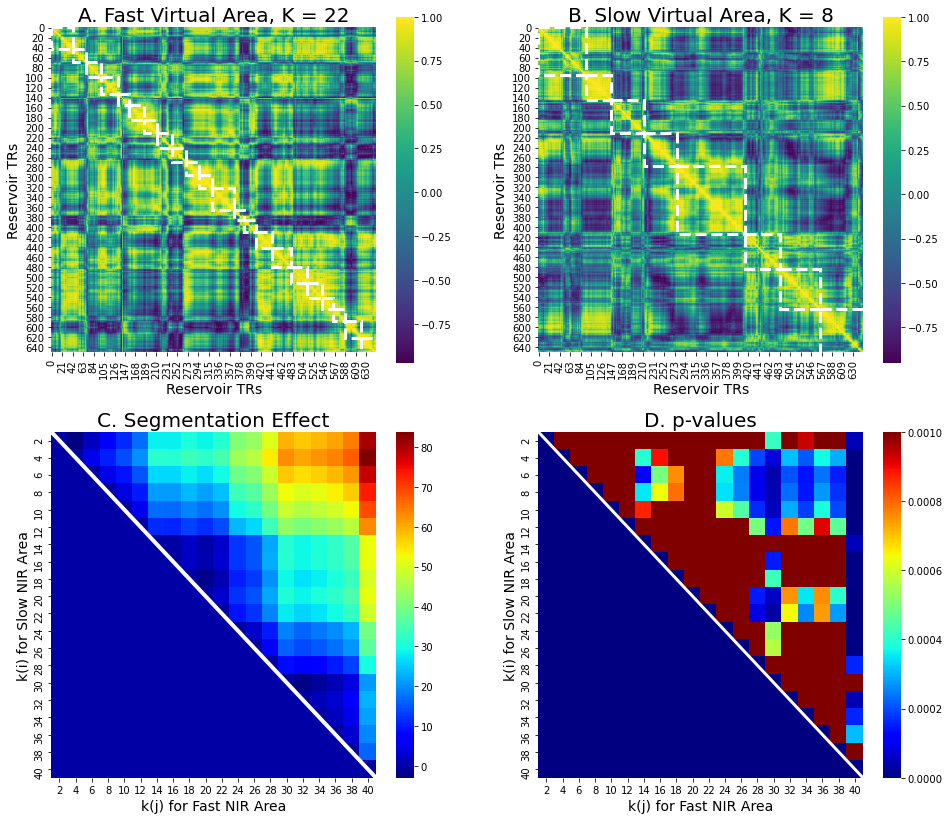

In [38]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################

A1 = np.linspace(2,40,20, dtype=int)
A2 = np.linspace(2,40,20, dtype=int)

color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((18.5, 11.5), 0.5, color='w', fill=False,  lw=3)
#ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color, xticklabels=A1, yticklabels=A2,vmin=-3)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((18.5, 11.5), 0.5, color='w', fill=False,  lw=3)
#ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color, xticklabels=A1, yticklabels=A2, vmax = .001)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('F10-Exp4-sherlock.png', dpi=600)


Text(0, 0.5, 'Log likelihood difference')

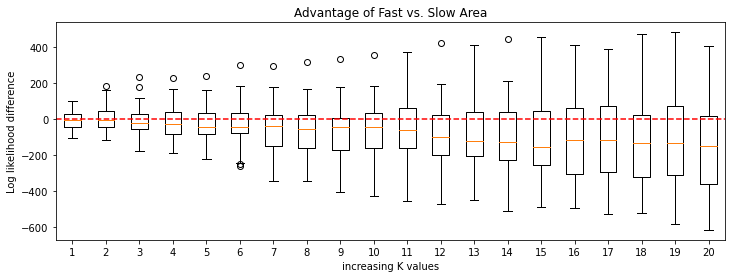

In [18]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# small K is slow, likelihood 1 is slow
# high K is fast, likelihood 0 is fast

#model k
#slow slow - fast slow
#slow fast - fast fast


f, ax = plt.subplots(1,1, figsize=(12, 4))

ax.boxplot(likelihood[:,:,1].T-likelihood[:,:,0].T)
#ax.boxplot(likelihood[:,:,0].T)
#ax.boxplot(likelihood[:,:,1].T)
#ax.boxplot(likelihood)
#ax.plot(likelihood[:,1])

plt.axhline(y=0, color='r', linestyle='--')


ax.set_title('Advantage of Fast vs. Slow Area')
ax.set_xlabel('increasing K values')
ax.set_ylabel('Log likelihood difference')
#
#sns.despine()

(array([1., 3., 5., 8., 4., 7., 5., 2., 3., 2.]),
 array([-1988.41258891, -1956.04239918, -1923.67220945, -1891.30201972,
        -1858.93183   , -1826.56164027, -1794.19145054, -1761.82126082,
        -1729.45107109, -1697.08088136, -1664.71069163]),
 <BarContainer object of 10 artists>)

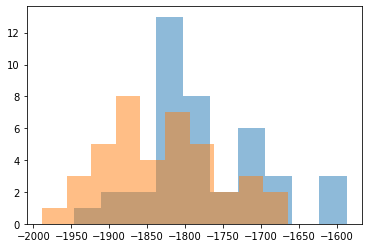

In [34]:
data3 = (likelihood[3,:,0]+ likelihood[14,:,1])/2
data4 = (likelihood[14,:,0]+ likelihood[3,:,1])/2

plt.hist(data4, alpha=0.5)
plt.hist(data3,alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f59de874bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f59de887490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f59de874790>,
 'medians': [<matplotlib.lines.Line2D at 0x7f59de887d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f59de87c1d0>,
 'means': []}

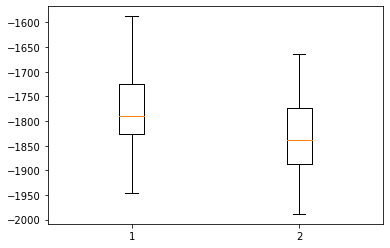

In [35]:
plt.boxplot([data4,data3])

In [36]:
#4 15 4.307048321216739 7.923701639107483e-05
t,p = stats.ttest_rel(data4,data3)
print(t)
print(p)
print(np.mean(data4-data3))

4.602339986434835
4.353523297020857e-05
52.59500235552637


In [22]:
print(np.shape(likelihood))
print(kvalues)

(20, 40, 2)
20


<AxesSubplot:>

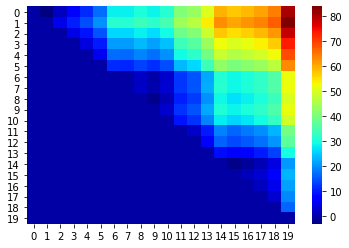

In [23]:
sns.heatmap(dmatrix,cmap='jet',vmin=-3)

In [24]:
print(dmatrix[11,13:20])
print(pmatrix[11,13:20])      

[ 9.93292693 18.7438036  16.54880031 18.09312053 19.9777548  23.26436745
 39.69085819]
[7.33013229e-03 5.30891138e-04 8.34763083e-03 4.98284489e-03
 5.89157086e-03 2.58304819e-03 3.73123380e-06]


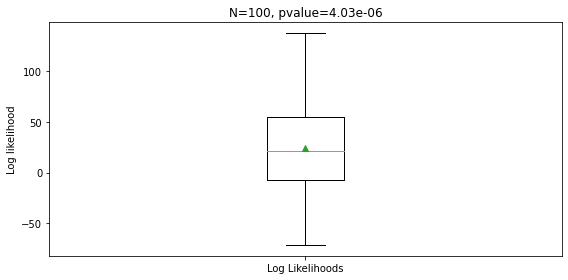

In [25]:

fig=plt.figure(figsize=(8, 4))
#f,ax = plt.subplots(1,1, figsize=(5, 5))
plt.boxplot(data4-data3,showmeans=True)
#plt.xlabel('Coherent                                    Incoherent')
plt.ylabel('Log likelihood')
#plt.axhline(y=0, color='r', linestyle='--')

plt.xticks([1], ['Log Likelihoods'])#ax.set_xticklabels(['Coherent-Incoherent'])
plt.title('N=100, pvalue=4.03e-06')
fig.tight_layout()
plt.savefig('temp2.png')

IndexError: index 25 is out of bounds for axis 0 with size 20

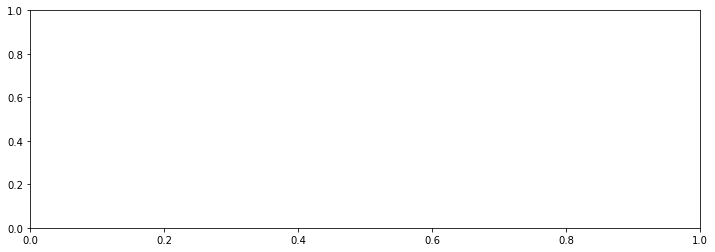

In [26]:
f, ax = plt.subplots(1,1, figsize=(12, 4))

ax.plot(likelihood[4,:,0]-likelihood[25,:,1])
#ax.boxplot(likelihood)
#ax.plot(likelihood[:,1])

plt.axhline(y=0, color='r', linestyle='--')


ax.set_title('Advantage of Fast vs. Slow Area')
ax.set_xlabel('increasing K values')
ax.set_ylabel('Log likelihood difference')
#
#sns.despine()

In [ ]:
likelihood = np.load('likelihood-june10.npy')

In [ ]:
#np.save('Sherlock-time1-june6.npy', Sherlock_time1) 
#np.save('Sherlock-time2-june6.npy', Sherlock_time2) 

#np.save('likelihood-june6.npy', likelihood) 

Sherlock_time1 = np.load('Sherlock-time1-last-june10.npy')
Sherlock_time2 = np.load('Sherlock-time2-last-june10.npy')

In [ ]:
Sherlock_time1 = np.load('Sherlock-time1-june10.npy')
Sherlock_time2 = np.load('Sherlock-time2-june10.npy')

In [ ]:
ev_time1 = brainiak.eventseg.event.EventSegment(88)
ev_time1.fit(Sherlock_time1)

ev_time2 = brainiak.eventseg.event.EventSegment(32)
ev_time2.fit(Sherlock_time2)
print((iteration+1)*step)

# save the variablility scores

coherent_ev1_var = ev_time1.event_var_
coherent_ev2_var = ev_time2.event_var_

# save likelihood scores
print(ev_time1.ll_[len(ev_time1.ll_)-1])
print(ev_time2.ll_[len(ev_time2.ll_)-1])


